# First pass analysis of line/loop data


### 1. recover the graphs from the pokes
### 2. Figure out what fraction of pokes are into lit-up ports

#### try to find the average poke time


## Plots to make

<ul>
    <li> Poke occupancy </li>
    <li> fraction of pokes to lit up ports </li>
    <li> Basic multinomial regression choice model </li>
    <li> Fraction of pokes in the 'correct' direction </li>
</ul>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set(font_scale=2,style='ticks')
import os
import re
import sys
import networkx as nx

# Defined functions 

In [197]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]
poke_pos = np.array(poke_pos)

In [198]:
def reconstruct_graph(dat_dict):
    
    nEntries = len(dat_dict['random'])
    edges = []
    for i in range(nEntries):
        if not dat_dict['random'][i]:
            edges.append((dat_dict['port'][i][0],dat_dict['port'][i][1][0]))
            edges.append((dat_dict['port'][i][0],dat_dict['port'][i][1][1]))
    return edges

In [199]:
layout

[5, 4, 6, 8, 7, 3, 2, 1, 0]

In [200]:
lines

['I Experiment name  : line_loop_batch_2\n',
 'I Task name : transition_task_yw\n',
 'I Task file hash : 4216607180\n',
 "I Subject ID : '418688_10'\n",
 'I Start date : 2020/02/01 16:33:13\n',
 '\n',
 'S {"reward_consumption": 2, "handle_poke": 1, "deliver_reward": 3, "free_rewards": 4}\n',
 '\n',
 'E {"rew_timer1": 26, "poke_2_out": 8, "poke_8_out": 20, "rew_timer2": 27, "rew_timer3": 28, "rew_timer": 25, "rew_timer4": 29, "poke_3_out": 10, "poke_9": 21, "poke_8": 19, "poke_5_out": 14, "poke_3": 9, "poke_2": 7, "poke_1": 5, "poke_4_out": 12, "poke_6_out": 16, "poke_7": 17, "poke_6": 15, "poke_1_out": 6, "poke_5": 13, "poke_4": 11, "poke_7_out": 18, "poke_9_out": 22, "end_consumption": 23, "session_timer": 24}\n',
 '\n',
 'V 0 task_nr 2\n',
 'V 0 reward_volume 7\n',
 'V 0 reward_absorbP 0.25\n',
 'V 0 click_volume 20\n',
 'V 0 setup_number 8\n',
 'V 0 subject_id 418688_10\n',
 'V 0 nActive_rewards 3\n',
 'V 0 TEST False\n',
 '\n',
 'P 0 G3_1\n',
 'P 0 LOOP\n',
 'P 1 [[1, 8], [0, 2], [

# Actual code to run stuff 

In [201]:
ROOT = "/Users/Yves/Desktop/mouse_behavior/line_loop_batch_2/"

In [202]:
get_mouse_id = lambda x: re.findall('_([0-9]{6}_.*?)_-',x)

In [203]:
get_date = lambda x: re.findall('_-*(202[0-9]-[0-9]{2}-[0-9]{2})',x)

In [204]:
fs = [i for i in os.listdir(ROOT) if '2020-02-01' in i]

In [205]:
res = []
all_edges = []
for f in fs:
    tmp = []
    print(f)
    lines = open(os.path.join(ROOT,f),'r').readlines()
    edgeS, edge_set,layout,task_nr = get_edges_and_layout(lines)
    all_edges.append(edgeS)
    G = nx.DiGraph()
    G.add_edges_from([i for i in edgeS if None not in i])
    #nx.draw(G,
    #    pos=np.array([1,-1])*poke_pos)
    
    tmp.append(get_mouse_id(f)[0])
    tmp.append(task_nr)
    tmp.append(G)
    tmp.append(layout)
    
    res.append(tmp)
    

_419544_1_-2020-02-01-120052.txt
_424551_10_-2020-02-01-120052.txt
_419544_30_-2020-02-01-120052.txt
_424551_1_-2020-02-01-120052.txt
_418688_10_-2020-02-01-120052.txt
_424550_1_-2020-02-01-120052.txt
_424550_10_-2020-02-01-163313.txt
_418688_1_-2020-02-01-120052.txt
_419544_10_-2020-02-01-163313.txt
_424551_1_-2020-02-01-163313.txt
_419544_30_-2020-02-01-163313.txt
_424551_10_-2020-02-01-163313.txt
_419544_1_-2020-02-01-163313.txt
_419544_10_-2020-02-01-120052.txt
_418688_1_-2020-02-01-163313.txt
_424550_1_-2020-02-01-163313.txt
_424550_10_-2020-02-01-120052.txt
_418688_10_-2020-02-01-163313.txt


In [206]:
all_mice = sorted(list(set([i[0] for i in res])))

In [207]:
len(res[0][3])

9

In [208]:
def fix_order(ordr):
    newOrder = []
    for i in ordr:
        if i==2:
            newOrder.append(1)
        elif i==1:
            newOrder.append(2)
        elif i==3:
            newOrder.append(5)
        elif i==5:
            newOrder.append(3)
        elif i==6:
            newOrder.append(7)
        elif i==7:
            newOrder.append(6)
        else:
            newOrder.append(i)
    return np.array(newOrder)

In [231]:
res_[3]

[8, 2, 7, 0, 4, 5, 1, 6, 3]

In [230]:
poke_pos

array([[149,   0],
       [ 68,  19],
       [231,  19],
       [  0,  62],
       [149,  62],
       [298,  62],
       [ 68, 105],
       [231, 105],
       [149, 124]])

In [229]:
poke_pos[res_[3]]

array([[149, 124],
       [231,  19],
       [231, 105],
       [149,   0],
       [149,  62],
       [298,  62],
       [ 68,  19],
       [ 68, 105],
       [  0,  62]])

array([[149, 124],
       [231, 105],
       [ 68, 105],
       [298,  62],
       [149,  62],
       [  0,  62],
       [231,  19],
       [ 68,  19],
       [149,   0]])

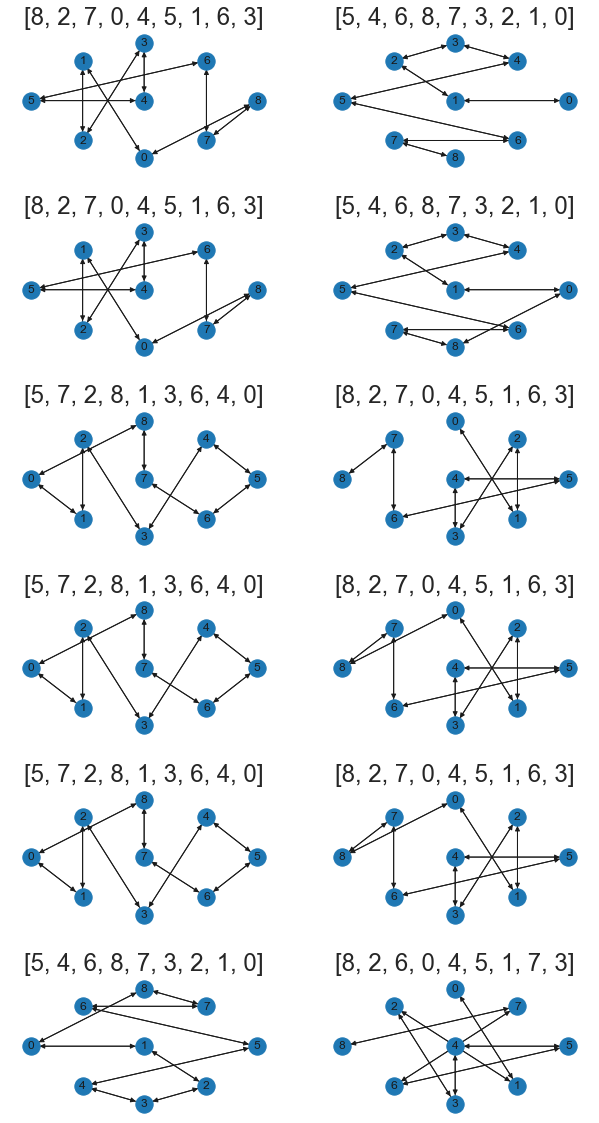

In [253]:
plt.figure(figsize=(9,24))
kk = 0
for m in all_mice[:6]:
    
    for res_ in res:
        if res_[0]==m:
            if res_[1]==1:
                plt.subplot(9,2,1 + kk*2)
                plt.title(res_[3])
                ordr = fix_order(res_[3]) 

                
                nx.draw(res_[2],
                       np.flipud(poke_pos)[res_[3]],
                       with_labels=True)#pos=[poke_pos[i] for i in ordr])
            elif res_[1]==2:
                plt.subplot(9,2,2 + kk*2)
                plt.title(res_[3])
                nx.draw(res_[2],
                       pos=poke_pos[res_[3]],
                       with_labels=True)
    kk += 1
plt.tight_layout()



In [42]:
len(all_mice)

9

In [38]:
poke_pos

[[149, 0],
 [68, 19],
 [231, 19],
 [0, 62],
 [149, 62],
 [298, 62],
 [68, 105],
 [231, 105],
 [149, 124]]

In [412]:
lines =f.readlines()

In [5]:
def get_edges_and_layout(lines):
    """ Function that takes in file and returns edges and layout"""
    nextEdges = False
    nextLayout = False
    for l in lines:
        
        if nextLayout:
            nextLayout = False
            layout = eval(l[3:])
            break
        if nextEdges:
            edge_set = eval(l[3:])
            nextEdges = False
            nextLayout = True
        if ('LOOP' in l or 'LINE' in l):
            nextEdges = True
        if 'task_nr' in l:
            task_nr = int(re.findall('task_nr ([0-9])\n',l)[0])

    edges = edges = [(kk,i) for kk,e in enumerate(edge_set) for i in e]
    return edges, edge_set, layout, task_nr

In [6]:
edges, edge_set,layout,task_nr = get_edges_and_layout(lines)

NameError: name 'lines' is not defined

In [7]:
task_nr

NameError: name 'task_nr' is not defined

In [313]:
experiment_name, task_name, subject_id, task_nr, graph,lineloop,date = get_metadata(lines)
dat_dict,events,event_times = parse_data(lines)


In [381]:
dat_dict.keys()

dict_keys(['state', 'port', 'random'])

In [374]:
def get_binned_pokes(events,event_times,binsize=50):
    inPoke_events=  ['poke_'+str(i) for i in range(1,10)]
    tot_ms = int(np.max(event_times)*1000)
    y = np.zeros([9,tot_ms])
    for kk,iPke in enumerate(inPoke_events):
        ixs = np.where(events==iPke)[0]
        #print(ixs)
        y[kk,(1000*event_times[ixs]).astype("int")] = 1
    
    y_clip = y[:,:int(binsize*np.floor(tot_ms/binsize))]
    Y = y_clip.reshape(9,-1,binsize).sum(axis=2) #checked axis of reshaping
    return Y
        

In [375]:
event_times[[1,2,4]]

array([67.58 , 67.901, 68.327])

In [376]:
y =get_binned_pokes(events,event_times,binsize=5000)

In [377]:
import tensorflow as tf
import tensorflow

/Users/Yves/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Yves/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Yves/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Yves/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [373]:
np.all(y[0].reshape(-1,50)==y.reshape(9,-1,50)[0])

True

In [371]:
np.arange(100).reshape(-1,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74],
       [75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84],
       [85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94],
       [95, 96, 97, 98, 99]])

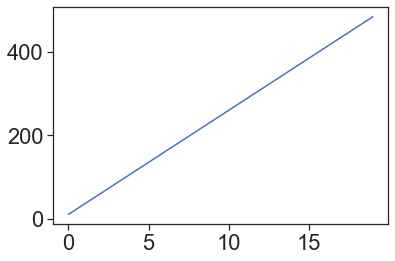

In [367]:
plt.plot(np.arange(100).reshape(-1,5).sum(axis=1))

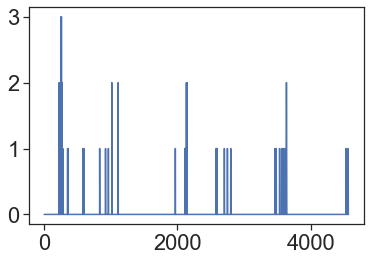

In [365]:
plt.plot(y[0].reshape(-1,500).sum(axis=1))

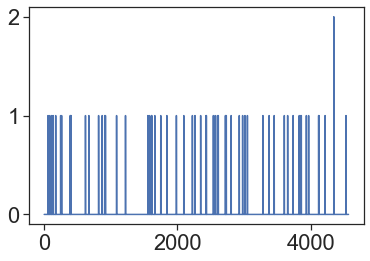

In [364]:
plt.plot(y[0].reshape(500,-1).sum(axis=0))

In [294]:
def get_distribution_of_poke_times(events,event_times):
    inPoke_events=  ['poke_'+str(i) for i in range(1,10)]
    ts = []
    for kk,event in enumerate(events):
        if event in inPoke_events:
            #print(event)
            tmp = np.where(np.array(events)[kk:]==events[kk] + '_out')
            #print(tmp)
            if tmp:
                outIx = np.argmin(tmp[0]) + kk + 1
                #print(kk,outIx)
                deltaT = event_times[outIx] - event_times[kk]
                ts.append(deltaT)
    return ts

In [295]:
ts = get_distribution_of_poke_times(events,event_times)

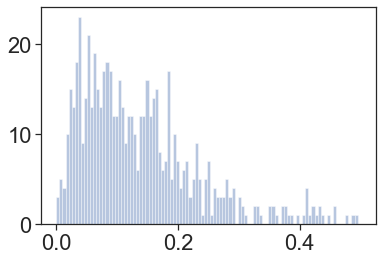

In [300]:
seaborn.distplot(ts,kde=0,bins=np.linspace(0,.5,num=100))


In [261]:
inPoke_events=  ['poke_'+str(i) for i in range(1,10)]

In [276]:
events[1]

'poke_4_out'

In [262]:
all_poke_seq = np.array([i for i in events if i in inPoke_events])

allNextPoke = []
for inPk in inPoke_events:
    inPk_ixs = np.where(all_poke_seq==inPk)[0]
    
    tmp = []
    for ix2 in inPk_ixs:
        if ix2<(len(all_poke_seq)-1):
            tmp.append(all_poke_seq[ix2+1])
    allNextPoke.append(tmp)

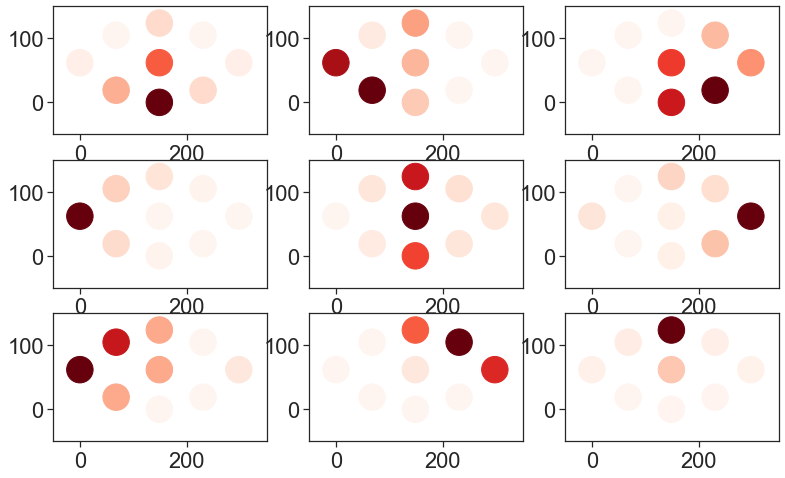

In [273]:
plt.figure(figsize=(13,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    poke_counts = [allNextPoke[i].count(ik) for ik in inPoke_events]
    plt.scatter([i[0] for i in poke_pos],[i[1] for i in poke_pos],c=poke_counts,s=700,cmap='Reds')
    plt.xlim(-50,350)
    plt.ylim(-50,150)
#seaborn.despine()

In [167]:
poke_counts = [events.count(i) for i in inPoke_events]

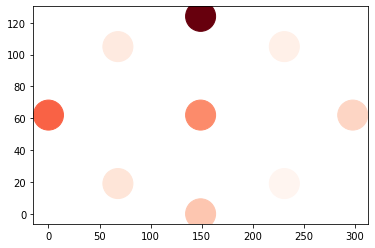

In [231]:
plt.scatter([i[0] for i in poke_pos],[i[1] for i in poke_pos],c=poke_counts,s=900,cmap='Reds')

In [ ]:
for i 